In [172]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [167]:
movies = pd.read_csv('tmdb_movies.csv')
genres = pd.read_csv('tmdb_genres.csv')

In [168]:
#Drop unnecessary columns
movies.drop(columns ='Unnamed: 0', inplace=True)

#Clearing date column
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d')

#Clear NaN
movies['homepage'].fillna('U', inplace=True)
movies['overview'].fillna('U', inplace=True)
movies['runtime'].fillna(0, inplace=True)
movies['tagline'].fillna('U', inplace=True)
movies['genre_id'].fillna(0, inplace=True)

#Convert to correct datatype
movies['runtime'] = movies['runtime'].astype('int')
movies['genre_id'] = movies['genre_id'].astype('int')


In [169]:
#Rename matching columns
genres.rename(columns={'Unnamed: 0': 'genre_id'}, inplace=True)

#Clear NaN
genres['genre_id'].fillna(0, inplace=True)
genres['genres'].fillna('U', inplace=True)

#Convert to correct datatype
genres['genre_id'] = genres['genre_id'].astype('int')

Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [ ]:
third_quantile = movies['vote_count'].quantile(0.75)
third_quantile
df = movies[movies['vote_count'] > third_quantile]
df.sort_values('vote_average', ascending=False, inplace=True)
df.iloc[:10]

Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

<AxesSubplot:xlabel='release_date'>

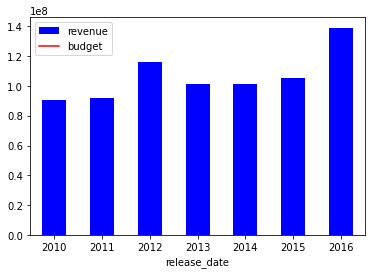

In [175]:
pd.options.display.float_format = '{:.2f}'.format

df_2 = movies[(movies['release_date'] > '2009-12-31 00:00:00') & (movies['release_date'] < '2017-01-01 00:00:00')]
df_2.sort_values('release_date', ascending=False)

df3 = df_2.groupby(df_2['release_date'].map(lambda x: x.year)).mean()

ax = df3.plot.bar(y='revenue', color='blue')
df3.plot.line(ax=ax, y='budget', color='red')

Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [177]:
movies_2 = movies.merge(genres,on='genre_id',how='inner')

Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [178]:
movies_2['genres'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
U                    28
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [179]:
runtime = movies_2.groupby('genres').mean()
runtime['runtime'].sort_values(ascending=False)

genres
History           133.96
War               126.12
Western           117.93
Drama             115.43
Adventure         113.06
Crime             112.14
TV Movie          110.50
Action            109.06
Science Fiction   109.03
Romance           107.09
Fantasy           106.49
Thriller          105.69
Music             102.85
Mystery           100.61
Comedy            100.46
Horror             94.75
Documentary        92.46
Family             89.80
Animation          89.55
Foreign            83.00
U                  50.39
Name: runtime, dtype: float64

Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

<AxesSubplot:xlabel='release_date'>

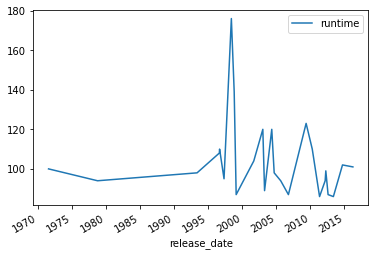

In [186]:
history = movies[movies_2['genres'] == 'History']
history.plot.line(x='release_date', y='runtime')